<a href="https://colab.research.google.com/github/21PA1A6132/STOCK_SCREENER/blob/main/Gradient_Descent_Combined_Cycle_Power_Point.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INFORMATION ABOUT THE DATASET

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.

Attribute Information:

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
Data = np.loadtxt('/content/drive/MyDrive/Machine Learning/training_ccpp_x_y_train.csv',delimiter=',')

In [50]:
Data.shape

(7176, 5)

In [53]:
x = Data[:,:4]
y = Data[:,4]

In [54]:
print(x.shape)
print(y.shape)

(7176, 4)
(7176,)


In [55]:
c_column = np.ones((x.shape[0],1))
x = np.append(x,c_column,axis=1)

In [57]:
x.shape

(7176, 5)

In [56]:
def step_gradient(x,y,alpha,m):
    M = x.shape[0]
    m_slope = (-2/M)*(((y - (x*m).sum(axis=1)).reshape(-1, 1))*x).sum(axis=0)
    m = m - alpha * m_slope
    return m

In [58]:
def cost(x,y,m):
    return ((y - (x*m).sum(axis=1)) ** 2).mean()


In [59]:
def gradient(x,y,training_itrerations,learning_rate):

  m = np.zeros(x.shape[1])
  costs = []
  for i in range(training_iterations):
    m = step_gradient(x, y, learning_rate, m)
    if i % 100 == 0:  # Record cost every 10 iterations
      current_cost = cost(x, y, m,)
      costs.append(current_cost)
      print(i, "Cost:", current_cost)
  return m, costs

In [69]:
training_iterations=50000
learning_rate =0.000000955555
m,costs= gradient(x,y,training_iterations,learning_rate)

print("Final coefficients:",m)


0 Cost: 198151.27763733896
100 Cost: 2982.877449938095
200 Cost: 259.1247084428733
300 Cost: 205.91342722979593
400 Cost: 191.2055556711163
500 Cost: 178.35216390560615
600 Cost: 166.71339582536717
700 Cost: 156.16224949311163
800 Cost: 146.59090321187267
900 Cost: 137.90261871572346
1000 Cost: 130.0105090146594
1100 Cost: 122.83651823281309
1200 Cost: 116.31050895381843
1300 Cost: 110.36944468189624
1400 Cost: 104.9566574516156
1500 Cost: 100.0211916796976
1600 Cost: 95.51721628599627
1700 Cost: 91.40349794636865
1800 Cost: 87.64292908806308
1900 Cost: 84.20210490770518
2000 Cost: 81.05094429118972
2100 Cost: 78.16235005115587
2200 Cost: 75.51190437783882
2300 Cost: 73.07759582885002
2400 Cost: 70.83957456813054
2500 Cost: 68.77993290867258
2600 Cost: 66.8825085218527
2700 Cost: 65.13270795214812
2800 Cost: 63.51734832301193
2900 Cost: 62.02451534079511
3000 Cost: 60.64343590154161
3100 Cost: 59.36436378267941
3200 Cost: 58.17847706025675
3300 Cost: 57.077786034384985
3400 Cost: 56.05

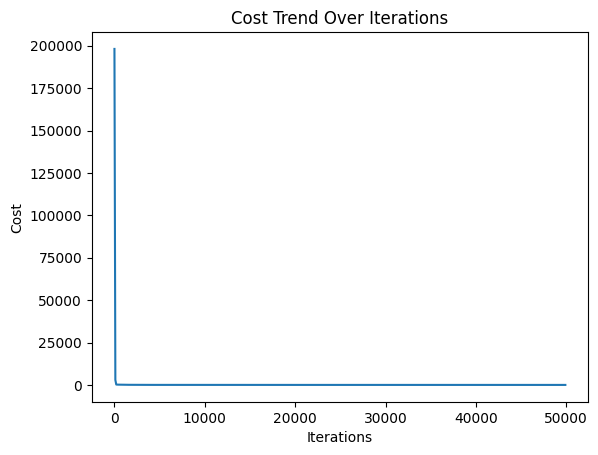

In [70]:
# Plotting the cost trend
plt.plot(range(0, training_iterations, 100), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Trend Over Iterations')
plt.show()


In [71]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

In [72]:
y_pred_train = np.dot(x,m)
mse_train = mean_squared_error(y, y_pred_train)
r2_train = r_squared(y, y_pred_train)
print(f'Mean Squared Error on training data: {mse_train}')
print(f'R-squared on training data: {r2_train}')

Mean Squared Error on training data: 28.967029434363237
R-squared on training data: 0.9013225301197973


In [73]:
x_test = np.loadtxt('/content/drive/MyDrive/Machine Learning/test_ccpp_x_test.csv',delimiter=',')
c_column = np.ones((x_test.shape[0],1))
x_test= np.concatenate((x_test,c_column),axis=1)

In [74]:
y_pred_test = np.dot(x_test,m)

# Assuming 'y_pred_test' contains the predictions
np.savetxt('/content/drive/MyDrive/Machine Learning/cpp_y_pred_test.csv', y_pred_test, delimiter=',')

In [75]:
y_pred_test.shape

(2392,)